##Loop Concept

In [2]:
from typing import TypedDict,Dict, List
from langgraph.graph import StateGraph, START, END
import random

In [10]:
class AgentState(TypedDict):
    name:str
    number: List[str]=[]
    counter: int

In [11]:
def greeting_node(state:AgentState) -> AgentState:
    state['name'] = f'Hi ! there {state['name']}'
    return state

In [18]:
def random_node(state:AgentState) -> AgentState:
    state['number'].append(random.randint(1,10))
    state['counter']=state['counter']+1
    return state

In [19]:
def should_continue(state:AgentState) -> AgentState:
    if(state['counter'] <= 5):
        return "random"
    else:
        return "exit"

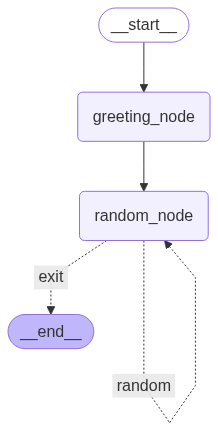

In [24]:
graph = StateGraph(AgentState)
graph.add_edge(START,"greeting_node")
graph.add_node("greeting_node",greeting_node)
graph.add_edge("greeting_node","random_node")
graph.add_node("random_node",random_node)
#graph.add_node("should_contine",lambda agent:agent)
graph.add_conditional_edges("random_node",should_continue,{
    "random":"random_node",
    "exit": END
})
graph.compile()

In [22]:
app = graph.compile(name="Loop Lang graph")
initial_state = AgentState(
    name='Bimal',
    number=[],
    counter=1
)
app.invoke(initial_state)

{'name': 'Hi ! there Bimal', 'number': [4, 3, 4, 2, 2], 'counter': 6}

Exercise:

You need to make a automatic higher or lower game.
Sets the bounds between 1 and 20. The graph has to keep guessing (max number of guesses is 7) where if the guess is correct, then it stops, but if not we keep looping until we hit the max limit of 7.

Each time a number is guessed, the hint node should say higher or lower and the graph should account for this information and guess the next guess accordingly.

Input: {"player_name":"Student", "guesses":[], "attempts":0, "lower_bound":1,"upper_bound":20}

Hint: It will need to adjust its bounds after every guess based on the hint provide by hint node. 


In [64]:
from typing import TypedDict,List
from langgraph.graph import StateGraph, START, END
import random

In [72]:
class AgentState(TypedDict):
    player_name:str
    guesses: List[int]
    attempts: int
    lower_bound: int
    upper_bound: int
    target:int
    result:str
    hint:str
    max_guess:str

In [73]:
def setup_node(state:AgentState)-> AgentState:
    state['guesses']=[]
    state['attempts']=0
    state['lower_bound']=1
    state['upper_bound']=20
    state['target'] = random.randint(state['lower_bound'],state['upper_bound'])
    state['result']=f"Hey !! {state['player_name']}. The target value is {state['target']}."
    state['hint']=''
    state['max_guess']=7
    return state

In [79]:
def guess_node(state:AgentState):

    if(state['guesses']):
        last_guess = state['guesses'][-1]
        print(state)

        if('guess is high' in state['hint']):
            state['upper_bound'] = last_guess-1
        elif ('guess is low' in state['hint']):
            state['lower_bound'] = last_guess+1
    
    if(state['attempts']<state['max_guess']):
        guess=random.randint(state['lower_bound'],state['upper_bound'])
        state['guesses'].append(guess)
        state['attempts']=state['attempts']+1
        if(guess > state['target']):
            state['hint'] = 'guess is high'
        elif (guess < state['target']):
            state['hint'] = 'guess is low'
        else:
            state['hint'] = 'guess is matched'
            state['result'] = state['result'] + f" Congratulations !! Your guess is correct with attempt {state['attempts']}"

    else:
        state['hint'] = 'Limit exceeded'
        state['result'] = state['result']+ f"Your limit is exceeded. Your guesses is {state['guesses']}"
    
    return state

In [ ]:
#

In [ ]:
def hint_node(state:AgentState) -> AgentState:
    if('Limit exceeded' in state['hint'] or 'guess is matched' in state['hint']):
        return "exit"
    else:
        return "continue"


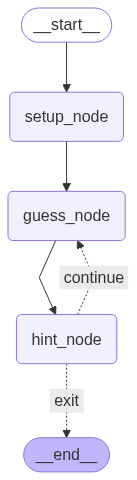

In [82]:
graph = StateGraph(AgentState)
graph.add_node('setup_node',setup_node)
graph.add_node('guess_node',guess_node)
graph.add_node('hint_node',lambda state:state)
graph.add_edge(START,"setup_node")
graph.add_edge("setup_node","guess_node")
graph.add_edge("guess_node","hint_node")
graph.add_conditional_edges("hint_node",hint_node,{
    "exit": END,
    "continue":"guess_node"
})
graph.compile()

In [84]:
initial_state = AgentState(
    player_name='Bimal',
    hint=''
)
app = graph.compile()
app.invoke(initial_state)

===== hint node started ======
{'player_name': 'Bimal', 'guesses': [19], 'attempts': 1, 'lower_bound': 1, 'upper_bound': 20, 'target': 11, 'result': 'Hey !! Bimal. The target value is 11.', 'hint': 'guess is high', 'max_guess': 7}
{'player_name': 'Bimal', 'guesses': [19], 'attempts': 1, 'lower_bound': 1, 'upper_bound': 20, 'target': 11, 'result': 'Hey !! Bimal. The target value is 11.', 'hint': 'guess is high', 'max_guess': 7}
===== hint node started ======
{'player_name': 'Bimal', 'guesses': [19, 18], 'attempts': 2, 'lower_bound': 1, 'upper_bound': 18, 'target': 11, 'result': 'Hey !! Bimal. The target value is 11.', 'hint': 'guess is high', 'max_guess': 7}
{'player_name': 'Bimal', 'guesses': [19, 18], 'attempts': 2, 'lower_bound': 1, 'upper_bound': 18, 'target': 11, 'result': 'Hey !! Bimal. The target value is 11.', 'hint': 'guess is high', 'max_guess': 7}
===== hint node started ======
{'player_name': 'Bimal', 'guesses': [19, 18, 3], 'attempts': 3, 'lower_bound': 1, 'upper_bound': 17

{'player_name': 'Bimal',
 'guesses': [19, 18, 3, 6, 15, 12, 9],
 'attempts': 7,
 'lower_bound': 10,
 'upper_bound': 11,
 'target': 11,
 'result': 'Hey !! Bimal. The target value is 11.Your limit is exceeded. Your guesses is [19, 18, 3, 6, 15, 12, 9]',
 'hint': 'Limit exceeded',
 'max_guess': 7}